In [4]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.special import boxcox1p
import pickle
from os import path
import statsmodels.api as sm

# data Visualization
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import plotly.express as px
from plotnine import ggplot, aes, geom_line, geom_point, facet_wrap, theme
import plotly.graph_objects as go

# Machine learning algorithms and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import bayesian_search_forecaster
from lightgbm import LGBMRegressor

# Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [5]:
features = pd.read_csv("Resources/features.csv")
stores = pd.read_csv("Resources/stores.csv")
train = pd.read_csv("Resources/train.csv")
df = pd.read_csv("Resources/walmart-sales-dataset-of-45stores.csv")


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [9]:
#looking for missing values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [10]:
#finding duplicates
df.duplicated().sum()

0

Exploratory Data analysis of the data.

In [13]:
df.describe().T



,count,mean,min,25%,50%,75%,max,std
Store,6435.0,23.0,1.0,12.0,23.0,34.0,45.0,12.988182
Date,6435,2011-06-17 00:00:00,2010-02-05 00:00:00,2010-10-08 00:00:00,2011-06-17 00:00:00,2012-02-24 00:00:00,2012-10-26 00:00:00,NaN
Weekly_Sales,6435.0,1046964.877562,209986.25,553350.105,960746.04,1420158.66,3818686.45,564366.622054
Holiday_Flag,6435.0,0.06993,0.0,0.0,0.0,0.0,1.0,0.255049
Temperature,6435.0,60.663782,-2.06,47.46,62.67,74.94,100.14,18.444933
Fuel_Price,6435.0,3.358607,2.472,2.933,3.445,3.735,4.468,0.45902
CPI,6435.0,171.578394,126.064,131.735,182.616521,212.743293,227.232807,39.356712
Unemployment,6435.0,7.999151,3.879,6.891,7.874,8.622,14.313,1.875885


In [15]:
df.describe(include="float64").T

,count,mean,std,min,25%,50%,75%,max
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [ ]:
# Histogram to understand the distribution of the data
import warnings

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

for i in df.select_dtypes(include=["int64", "float64"]).columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=i)
    plt.show()

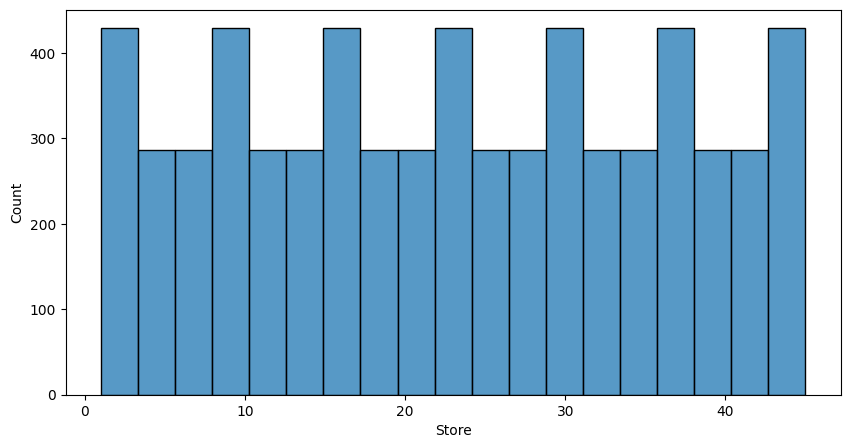

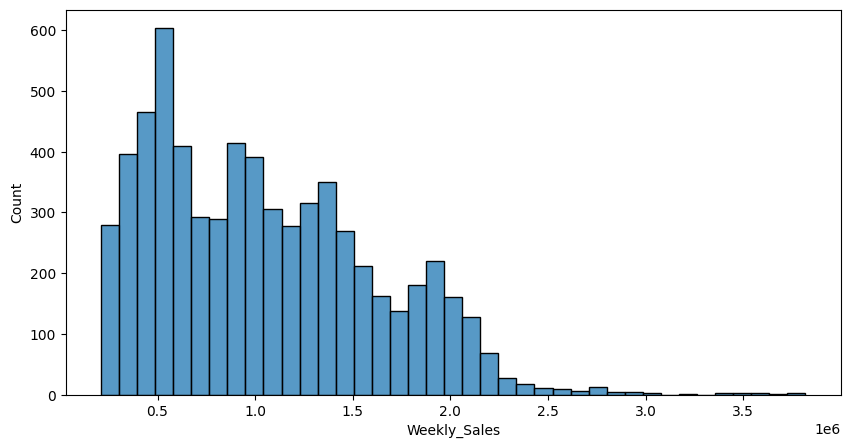

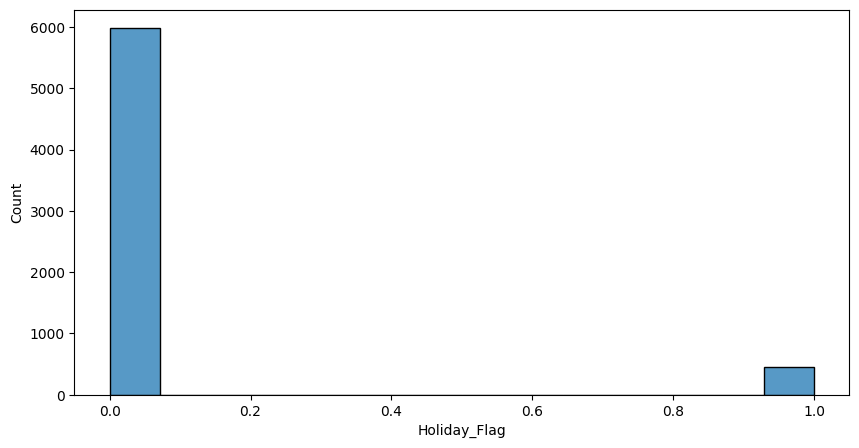

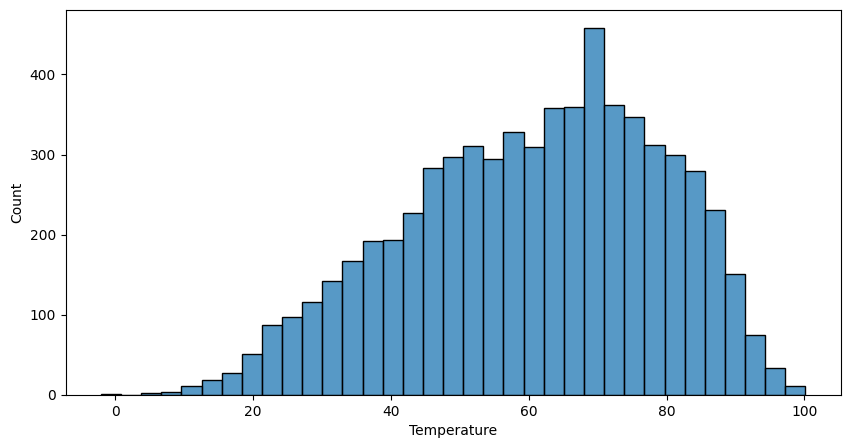

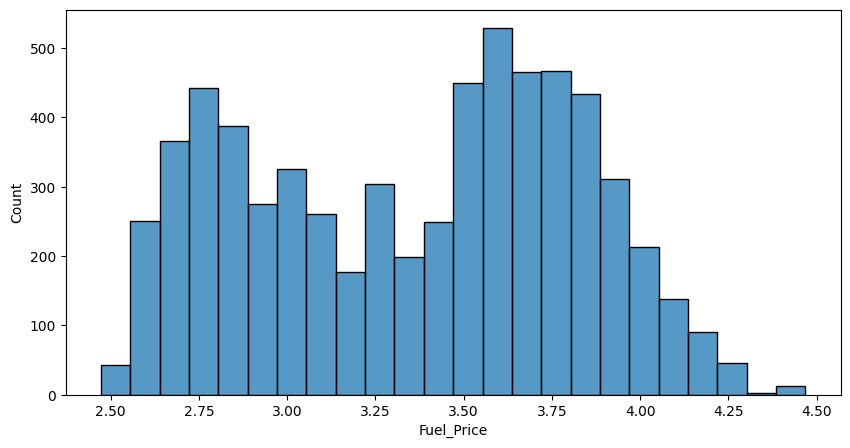

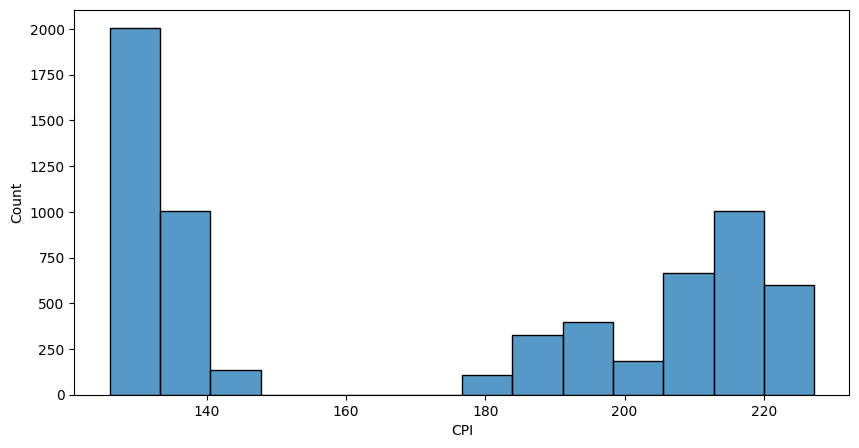

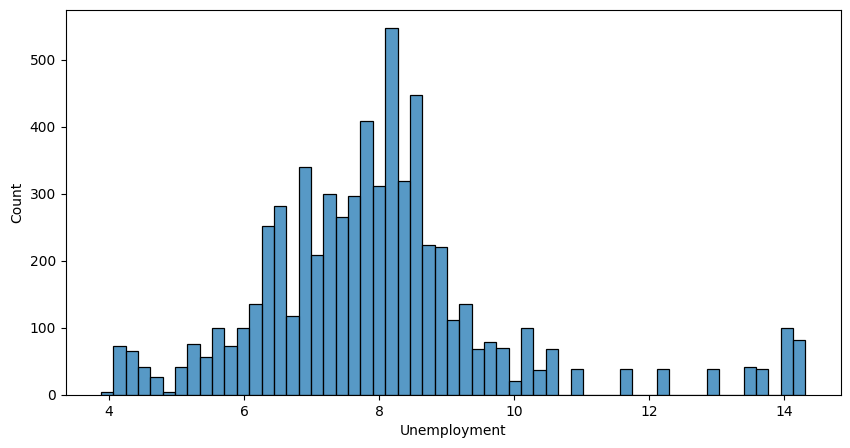

In [17]:
#Histogram to understand the distribution of the data
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
for i in df.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df,x=i)
    plt.show()  

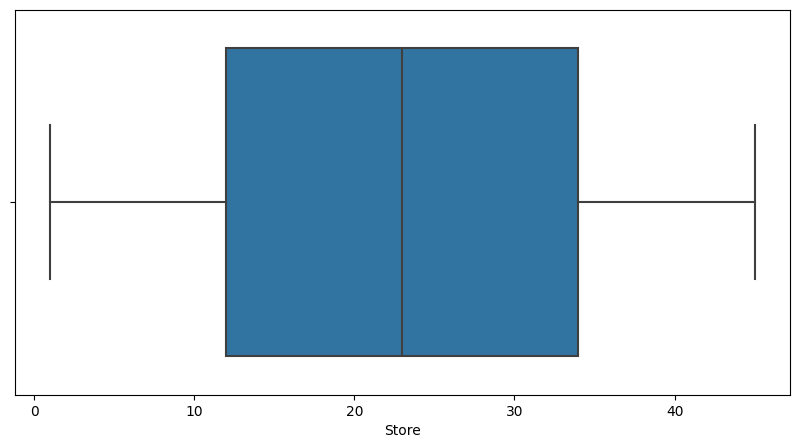

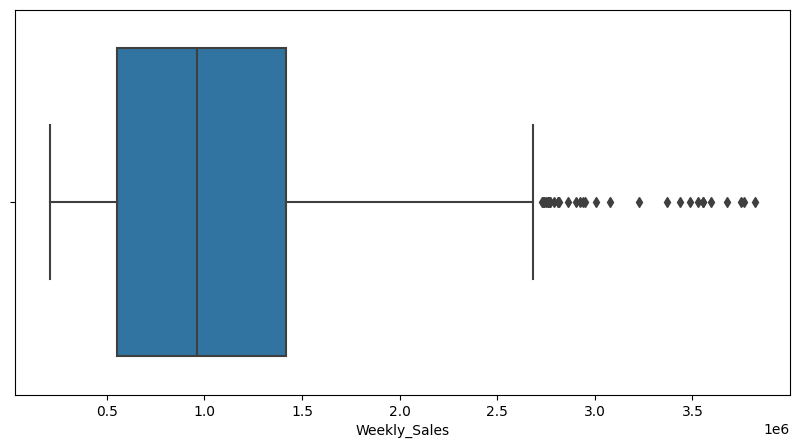

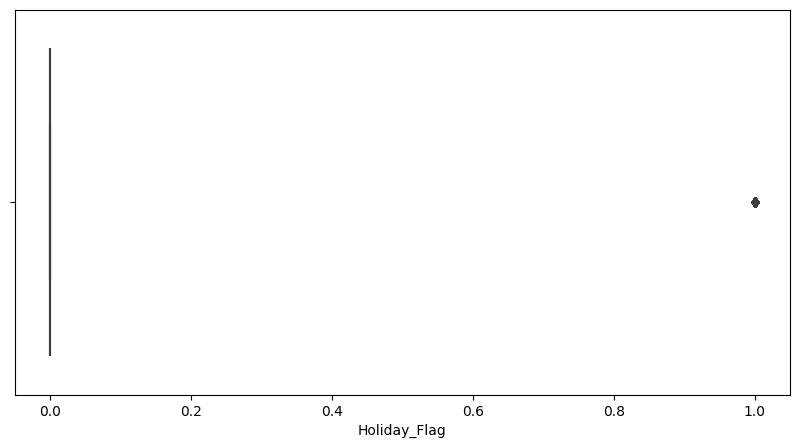

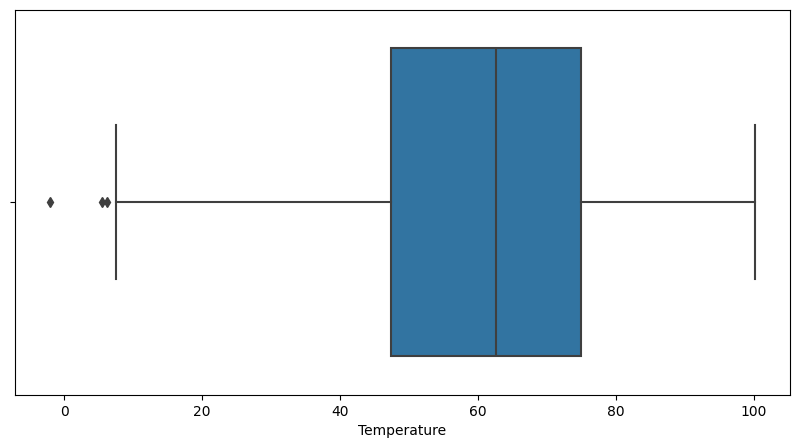

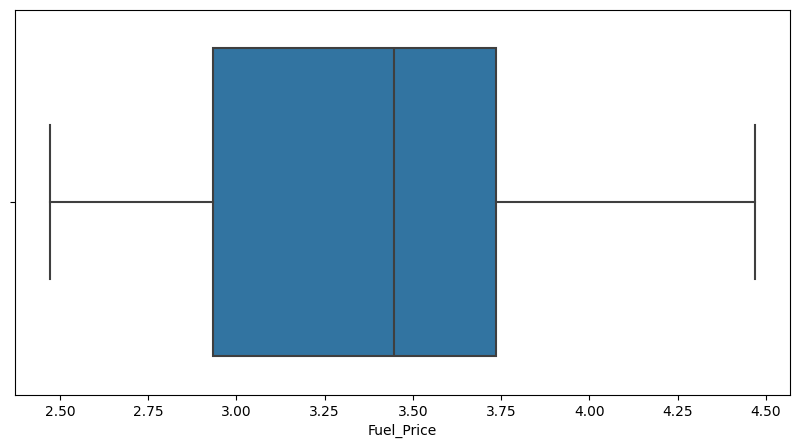

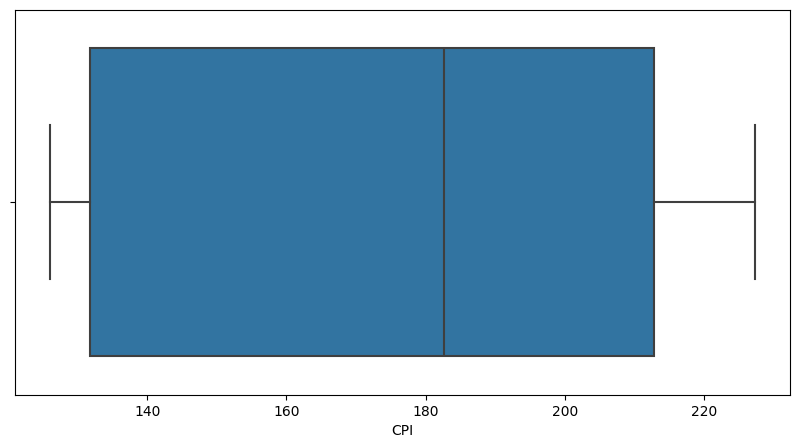

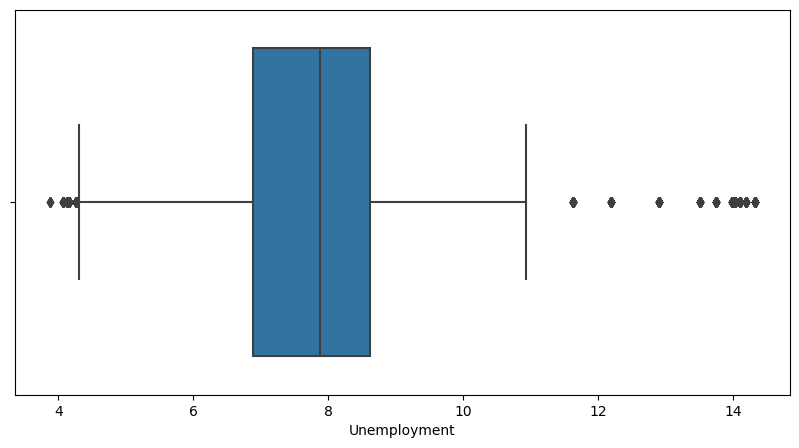

In [18]:
# Histogram to understand the distribution of the data
import warnings

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

for i in df.select_dtypes(include=["int64", "float64"]).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=i)
    plt.show()

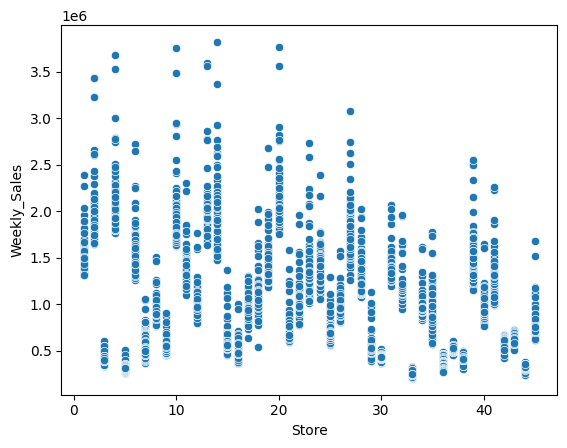

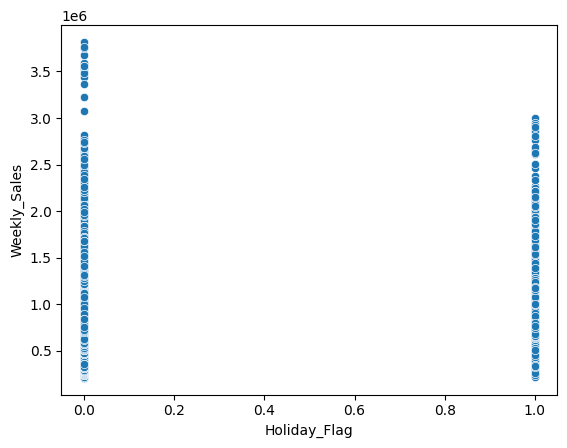

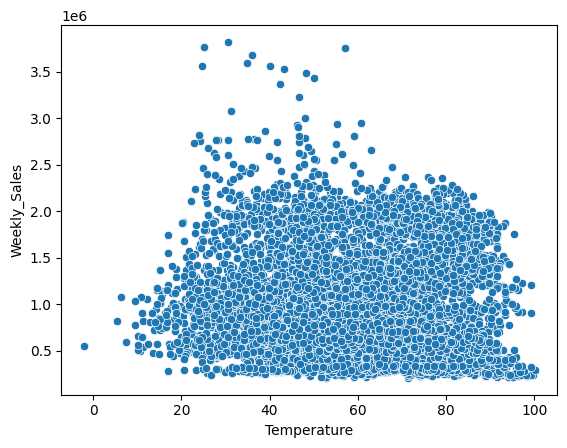

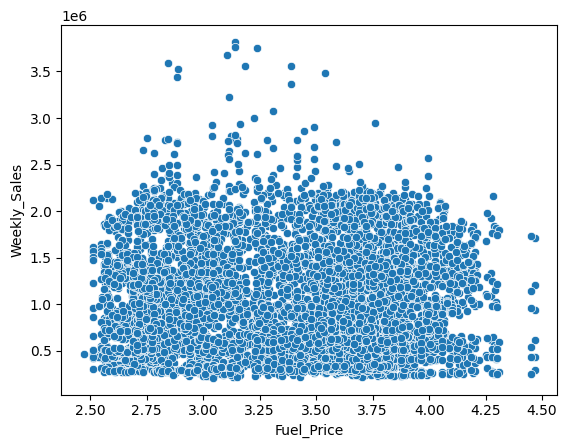

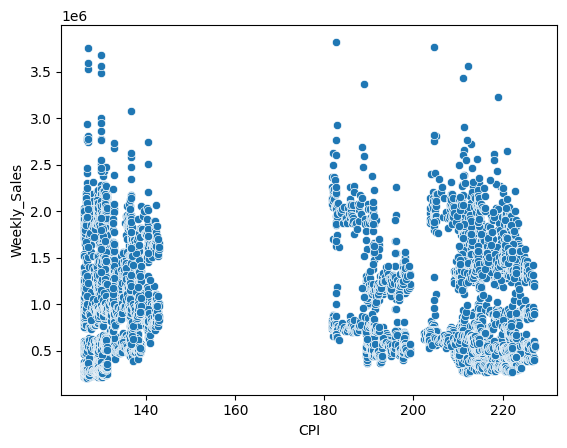

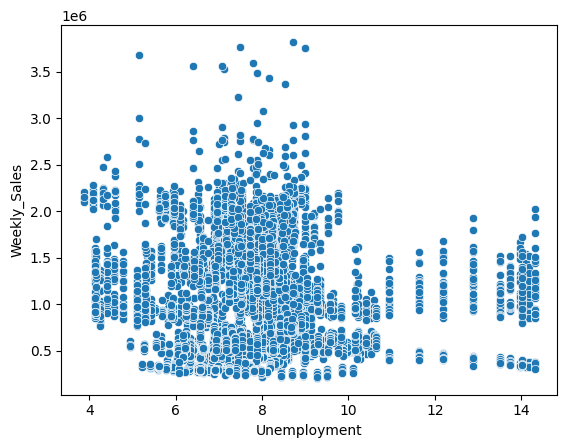

In [24]:
for i in ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']:
    sns.scatterplot(data=df, x=i, y='Weekly_Sales')
    plt.show()


In [20]:
#scatter plot to understand the relationship between the variables
df.select_dtypes(include="number").columns 

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')

In [34]:
# corrleation matrix to interpret the relation and multicolliniarity
s=df.select_dtypes(include="number").corr()

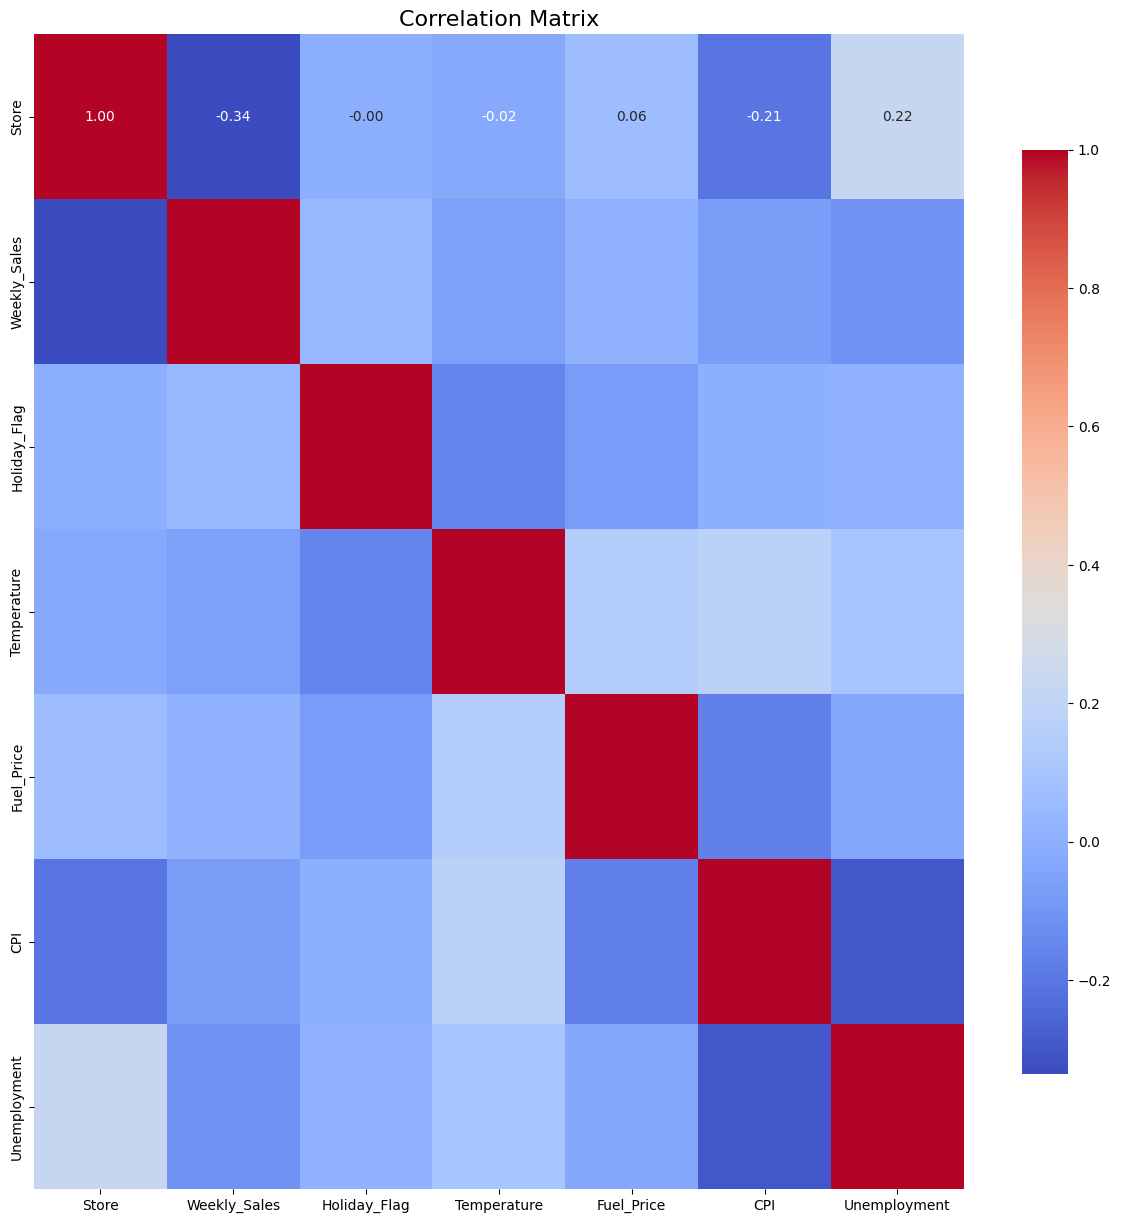

In [37]:
plt.figure(figsize=(15, 15))
sns.heatmap(s, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"shrink": 0.8})

# Set the title for the heatmap
plt.title("Correlation Matrix", fontsize=16)

# Display the heatmap
plt.show()

In [41]:
df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [43]:
X = df.drop(columns=["Weekly_Sales"])
y = df["Weekly_Sales"]

# Split the data into training and testing sets
# Convert datetime column to numerical representation
X_train['Date'] = X_train['Date'].astype(int)
X_test['Date'] = X_test['Date'].astype(int)

# Create a Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions using the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Optional: Print the model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
# Here's a step-by-step explanation of the code:

# Extract Features and Target: We assume your DataFrame is named DF and the target variable is "Weekly Sales". We extract features (X) by dropping the "Weekly Sales" column and set y as the target variable.
# Data Splitting: We split the dataset into training and testing sets using train_test_split from scikit-learn.
# Model Creation: We create an instance of the LinearRegression model from scikit-learn.
# Model Training: We train the model using the training data with the fit method.
# Predictions: We make predictions on the testing data using the predict method.
# Model Evaluation: We evaluate the model using mean_squared_error and r2_score to calculate the mean squared error and R-squared value, respectively.





Mean Squared Error: 265505710010.37976
R-squared: 0.1599580369039153
Intercept: 1412416.1212260583
Coefficients: [-1.55660248e+04  3.31542841e-13  3.74467688e+00 -1.31052838e+03
  1.27525343e+00 -2.09422783e+03 -3.82357733e+02]
